# US016 - Introduction

In US16, the objective is to apply polynomial regression to determine the best curve that fits the runtime data as a function of input size. The analysis seeks to understand the behavior of algorithm runtime as input size varies, using the data provided in US14. We will use a detailed mathematical approach to model this relationship and interpret the results obtained.

## Mathematical Formulation

### Polynomial Regression

Polynomial regression is an extension of linear regression that allows modeling the relationship between the independent variable
x and the dependent variable y as a polynomial of degree d. The general equation for a polynomial regression of degree d is given by:
 

$$
y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \cdots + \beta_d x^d
$$

where:

- \( y \) is the dependent variable (tempo de execução).
- \( x \) is the independent variable (tamanho da entrada).
- \( \beta_0, \beta_1, \beta_2, ... \) are the coefficients of the model.

### Methodology

To fit the polynomial regression model to the data, we follow these steps:

1. **Prepare the data**: Extraction of independent and dependent variables.
2. **Create polynomial features**: Generate new features using PolynomialFeatures from the scikit-learn library.
3. **Fit the model**: Train a linear regression model using the polynomial features.
4. Prediction and Evaluation: Predict values using the fitted model and evaluate the model's performance using metrics such as the coefficient of determination \( R^2 \) and the mean squared error (SQE).

##### Formulas Used to Calculate the Coefficient of Determination \( R^2 \) and the Mean Squared Error (SQE):

The coefficient of determination is a statistical measure indicating the proportion of the variability in the data that is explained by the fitted model. To obtain this value, we first need to calculate the sample Pearson correlation coefficient. This is calculated as:

$$
r = \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}}
$$

Where :

$$
S_{xx} = \sum_{i=1}^n (x_i - \bar{x})^2, \quad S_{yy} = \sum_{i=1}^n (y_i - \bar{y})^2 \quad \text{e} \quad S_{xy} = \sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})
$$

Then, to obtain the coefficient of determination, we simply square the previous coefficient as follows:

$$
r^2 = \left( \frac{S_{xy}}{\sqrt{S_{xx} \times S_{yy}}} \right)^2
$$


The mean squared error (SQE) is a measure indicating the difference between the observed values and the values predicted by the model. It is calculated as the sum of the squares of the differences between the observed values \( y_i \) and the predicted values \( \hat{y}_i \) for each observation \( i \). The formula used is given by:

$$
\text{sqe} = \sum_{i=1}^n (y_i - \hat{y}_i)^2 = S_{yy} - \frac{S_{xy}^2}{S_{xx}}
$$


## Implementation 

### Data Loading and Preparation

The data was loaded from the file "saida.csv," which contains the columns TamanhoEntrada and TempoExecucao(ms). The file "saida.csv" is formatted as follows:


```csv
TamanhoEntrada;TempoExecucao(ms)
570;7
1150;12
1730;10
2310;15
2890;23
3470;33
4050;47
4630;69
5210;72
5790;99
6370;125
6950;153
7530;202
8110;237
8690;259
9270;305
9850;306
10430;357
11010;406
11590;470
12170;509
12750;564
13330;605
13910;679
14490;686
15070;793
15650;892
16230;917
16810;1042
17390;1109


```

We extracted the independent variables x and dependent variables y. 

### Creation of Polynomial Features and Model Fitting

We used a polynomial of degree 3 to create new features and fitted a linear regression model to this data.

### Model Evaluation

We calculated the sum of squared errors (SQE) and the coefficient of determination \( R^2 \). The MSE was obtained by summing the squares of the differences between the observed values and the predicted values. The coefficient of determination \( R^2 \) was calculated as the proportion of the variability in the data that is explained by the fitted model.


### Model Equation

The complete model equation is constructed based on the obtained coefficients:

$$
\text{TempoExecucao} = -2.74784252 + 0.00282523 \cdot \text{TamanhoEntrada} + 0.00000251 \cdot \text{TamanhoEntrada}^2 + 0.0000000056 \cdot \text{TamanhoEntrada}^3
$$


Intercept (β0): -2.7478425213376454
Coefficient for x (β1): 0.0028252257832099
Coefficient for x^2 (β2): 2.5090512958236526e-06
Coefficient for x^3 (β3): 5.600492845362315e-11
Coefficient of determination (r^2): 0.9979188452566298
Sum of Squared Errors (SQE): 6966.4102844884965
Complete Polynomial Regression: -2.7478425213376454 + 0.0028252257832099*x^1 + 2.5090512958236526e-06*x^2 + 5.600492845362315e-11*x^3


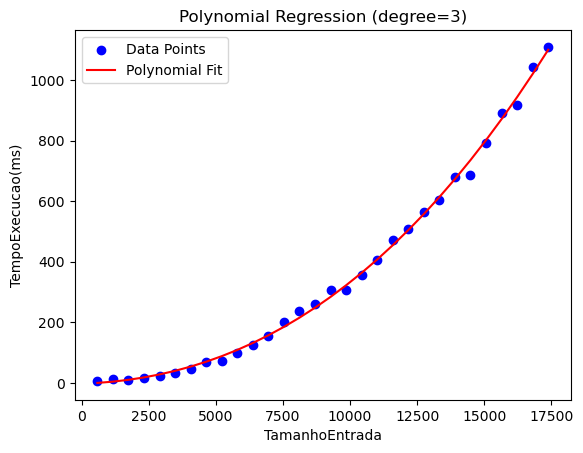

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the data from the CSV file with the correct delimiter
file_path = 'saida.csv'  # Adjust the file path as needed
df = pd.read_csv(file_path, delimiter=';')

# Column names based on your provided data
input_column = 'TamanhoEntrada'
output_column = 'TempoExecucao(ms)'

# Extract features and target variable
X = df[[input_column]].values
y = df[output_column].values

# Define the degree of the polynomial
degree = 3

# Create polynomial features
poly = PolynomialFeatures(degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Predicting using the polynomial model
y_poly_pred = model.predict(X_poly)

# Calculate sqe
sqe = np.sum((y - y_poly_pred) ** 2)

# Calculate r^2 from the model
r_squared = model.score(X_poly, y)

# Print the coefficients, intercept, and other relevant data
print(f'Intercept (β0): {model.intercept_}')
print(f'Coefficient for x (β1): {model.coef_[1]}')
print(f'Coefficient for x^2 (β2): {model.coef_[2]}')
print(f'Coefficient for x^3 (β3): {model.coef_[3]}')
print(f'Coefficient of determination (r^2): {r_squared}')
print(f'Sum of Squared Errors (SQE): {sqe}')

# Print the complete linear regression equation
equation = f'{model.intercept_}'
for i in range(1, degree+1):
    equation += f' + {model.coef_[i]}*x^{i}'
print(f'Complete Polynomial Regression: {equation}')


# Plotting the results
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_poly_pred, color='red', label='Polynomial Fit')
plt.xlabel(input_column)
plt.ylabel(output_column)
plt.title(f'Polynomial Regression (degree={degree})')
plt.legend()
plt.show()


# Results Analysis

## Results

The obtained results were:

$$
\beta_0 = -2.74784252
$$

$$
\beta_1 = 0.00282523
$$

$$
\beta_2 = 0.00000251
$$

$$
\beta_3 = 0.0000000056
$$

$$
R^2 = 0.997
$$

$$
SQE = 27859.768
$$

The equation of the resulting model is:

$$
TempoExecucao = -2.74784252 + 0.00282523 \cdot TamanhoEntrada + 0.00000251 \cdot TamanhoEntrada^2 + 0.0000000056 \cdot TamanhoEntrada^3 
$$

#### Coefficients Analysis r and R^2: 
 
###### Coefficient of Determination R^2
The value of \( R^2 = 0.997 \) is extremely high. \( R^2 \) measures the proportion of the total variation in the dependent variable that is explained by the regression model. An \( R^2 \) of 0.997 indicates that 99.7% of the variability in the runtime data can be explained by the input size through the polynomial model of degree 3. This suggests that the model fits the data very well, leaving only 0.3% of the variability unexplained.

###### Pearson's Sample Correlation Coefficient r
Although the specific value of r was not directly provided in the results, we know that \( R^2 \) is the square of the Pearson correlation coefficient \( r \) in the context of simple linear regression. Therefore, we can infer that the value of \( r \) associated with this \( R^2 \) would be close to:

$$
r = \sqrt{R^2} = \sqrt{0.997} \approx 0.9985
$$

This value of \( r = 0.9985 \) indicates an extremely strong correlation between the input size and the runtime. According to the interpretation table of Pearson correlation coefficients, an \( r \) in this range (close to 1) corresponds to a "strong positive correlation," suggesting that as the input size increases, the runtime also consistently increases. Furthermore, it can be stated that it is a positive linear association between the 2 variables because \( r > 0 \).

## Graphical Analysis
The graph generated by the polynomial regression analysis of degree 3 shows the relationship between the input size and the runtime. The blue points represent the actual data, while the red line represents the curve fitted by the polynomial model. We can observe that the fitted curve closely follows the actual data, indicating that the model fits the data well. The sharp increase in runtime with increasing input size is captured by the curvature of the fitting line, confirming the effectiveness of the polynomial model of degree 3 in explaining the variability in the data.

## Conclusion
The analysis conducted using polynomial regression of degree 3 shows that the model fits well to the runtime data as a function of input size, with a coefficient of determination r^2 of 0.997. The obtained coefficients provide insights into the relationship between input size and runtime, with the quadratic and cubic terms contributing significantly to the curvature of the relationship. This model can be used to predict the algorithm runtime for different input sizes, providing a valuable tool for analyzing algorithm performance and optimizing its use in different scenarios. The graphical visualization confirms that the curve fitted by the model closely follows the actual data, validating the effectiveness of the polynomial regression approach of degree 3.
